In [22]:
#  #https://www.w3schools.com/python/python_ml_decision_tree.asp
# Machine Learning Lab2: Created by Jibrael Jos,PhD
# Topic: Decision Tree Explorations
# Student Name:Naveen Krishna
# Roll No:23
# Date:7 March
# Submission : 
# Python Notebook as PDF (File Name MLDecisionTree23.pdf) 
# and Observations in MLLab2_23.xlsx 

# Where 21 can be replaced with your roll number

In [23]:
import pandas
from sklearn import svm
import matplotlib.pyplot as plt

df = pandas.read_csv("dataTree1.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank','Nationality']

print(features)
Xla = df[features]
y = df['Go']


['Age', 'Experience', 'Rank', 'Nationality']


In [24]:
Xla_mean = Xla.mean()
Xla_std = Xla.std()

#Standardization
Data = (Xla - Xla_mean)/Xla_std
print(Data)

         Age  Experience      Rank  Nationality
0  -0.272579    0.201447  1.128763    -1.070462
1   0.179786    0.550621 -1.491580     0.089205
2  -1.252706   -0.846076 -0.443443     1.248872
3   0.933730   -0.846076 -1.491580     0.089205
4   0.255181    2.121905  0.604695     0.089205
5   0.330575    0.899795 -0.967511    -1.070462
6   1.989250   -1.020663  0.080626     1.248872
7  -0.347974    0.899795  1.128763    -1.070462
8   0.933730    0.725208  0.080626     1.248872
9  -0.347974   -0.671489  1.128763     1.248872
10 -1.177311   -1.020663 -0.967511     0.089205
11 -1.629677   -1.020663  0.080626    -1.070462
12  0.405969    0.026860  1.128763    -1.070462


In [25]:
n_components = 4

from sklearn.decomposition import PCA
pca = PCA(n_components)
pca.fit(Data)
X_pca = pca.transform(Data)

X = pandas.DataFrame(X_pca, columns=[f'PCA {i+1}' for i in range(n_components)])
print(X)

       PCA 1     PCA 2     PCA 3     PCA 4
0   1.420065  0.313159  0.429066 -0.485925
1  -0.558435 -0.308436 -1.391437  0.474547
2  -1.248060  1.126532  0.523247  0.970012
3  -1.463285 -0.199105 -1.022125 -0.771283
4   1.369887 -1.376054 -0.107677  1.076801
5   0.607908 -0.327624 -1.583302 -0.130926
6  -1.676299 -1.441321  0.797372 -1.020717
7   1.816377  0.016001  0.224057 -0.032075
8  -0.524193 -1.487050  0.343364  0.599971
9  -0.509171  0.158117  1.730839  0.354556
10 -0.895507  1.537296 -0.386741  0.238889
11  0.462475  2.131490  0.007539 -0.304633
12  1.198239 -0.143005  0.435797 -0.969217


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = svm.SVC()
clf = model.fit(X_train, y_train)

In [27]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.3333333333333333

SVC(kernel='linear')


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 4 features as input.

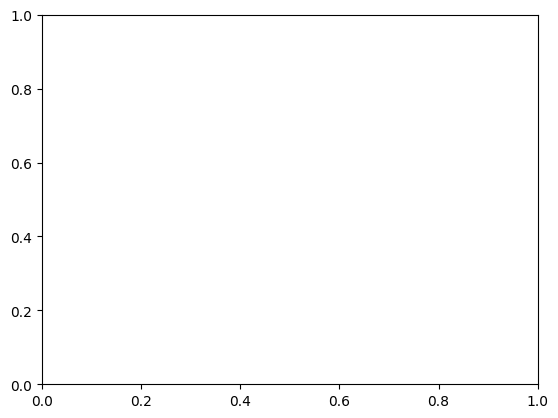

In [32]:
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target
import numpy as np

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xla, y)
print(clf)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
# print(X)
# print(y)
# print(X.iloc[:, 1])
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.summer, alpha=0.1)
ax.scatter(X0, X1, c=y, cmap=plt.cm.summer, s=30, edgecolors='k')
ax.set_ylabel('Rank')



































































ax.set_xlabel('Age')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()